In [1]:
# Visualization with vnstock_ezchart 

from vnstock_ezchart import *
from vnstock import Vnstock
ezchart = MPlot() # Khởi tạo đối tượng
# Set date range
start_date = '2024-01-01'
end_date = '2025-03-19'
interval = '1D'
stock = Vnstock().stock(symbol='REE', source='VCI')
candle_df = stock.quote.history(start= start_date, end= end_date)
 
CashFlow = stock.finance.cash_flow(period='year', dropna=True)
#CashFlow.to_csv('./outputs/CashFlow.csv')
# List the columns headers 
CashFlow.columns.tolist()
# ## Transpose the CF dataframe 
#CashFlow
CashFlow_transposed = CashFlow.T
CashFlow_transposed.columns = CashFlow['yearReport']
# Drop the duplicate 'yearReport' row
CashFlow_transposed = CashFlow_transposed.drop('yearReport')
CashFlow_transposed.head()

Phiên bản Vnstock 3.2.5 đã có mặt, vui lòng cập nhật với câu lệnh : `pip install vnstock --upgrade`.
Lịch sử phiên bản: https://vnstocks.com/docs/tai-lieu/lich-su-phien-ban
Phiên bản hiện tại 3.2.2

yearReport,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
ticker,REE,REE,REE,REE,REE,REE,REE,REE,REE,REE,REE,REE
Net Profit/Loss before tax,2687606595302,3056093471161,3878561080509,2399829028939,1923585472508,1920209997754,2118013069944,1721146987668,1375753903562,1045676170298,1262427405945,1087556959984
Depreciation and Amortisation,1298493472359,1263900546872,1225256688185,892746007729,321516852418,182619094137,161304336971,130117592892,139556922833,132711178140,57142979454,61183861575
Provision for credit losses,94886966817,267350820613,98981408043,18405779937,23057787014,-37003997619,-181821279821,63225518370,-7712055856,8470325013,-26958372500,36502068928
Unrealized foreign exchange gain/loss,13364760,34472956246,42356802295,-54068058823,51724431455,141521813,180374946,283085334,279701943,-29384453,1641418011,4239193028


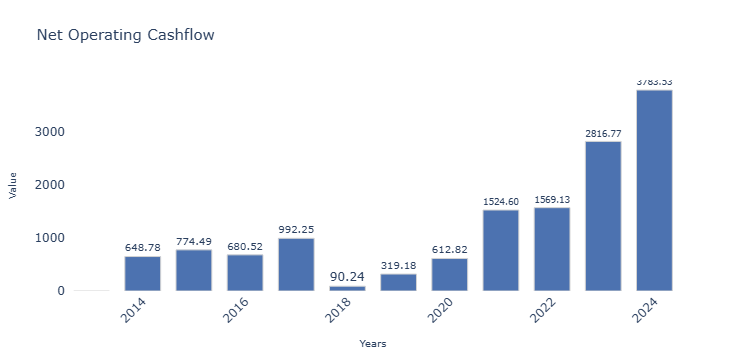

Interactive plot saved to ./outputs/Net_OCF_plotly.html


In [4]:
# Convert seaborn chart to plotly
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import HTML

# Normalize values to billions (same as in the seaborn chart)
data = CashFlow['Net cash inflows/outflows from operating activities'] / 1000_000_000

# Sort data by year to ensure proper ordering (same as in the seaborn chart)
sorted_indices = CashFlow['yearReport'].argsort()
years = CashFlow['yearReport'].iloc[sorted_indices]
sorted_data = data.iloc[sorted_indices]

# Create the plotly figure
fig = go.Figure()

# Add bar chart
fig.add_trace(go.Bar(
    x=years,
    y=sorted_data,
    text=[f'{v:.2f}' for v in sorted_data],  # Add text labels
    textposition='outside',  # Position text outside of bars
    marker=dict(
        color='#4c72b0',  # Similar to seaborn default blue
        line=dict(color='lightgrey', width=1)
    ),
    width=0.7  # Match the width from seaborn
))

# Update layout to match seaborn styling
fig.update_layout(
    title={
        'text': 'Net Operating Cashflow',
        'font': {'size': 15}
    },
    xaxis={
        'title': {'text': 'Years', 'font': {'size': 10}},
        'tickangle': -45  # Rotate x-axis labels for better readability
    },
    yaxis={
        'title': {'text': 'Value', 'font': {'size': 10}},
        'range': [0, max(sorted_data) * 1.05]  # Add 5% padding to y-axis
    },
    margin=dict(l=50, r=50, t=80, b=50),  # Adjust margins
    showlegend=False,
    plot_bgcolor='white'  # White background like seaborn
)

# Display the plot inline in the notebook
fig.show()

# Save as interactive HTML
html_file_path = './outputs/Net_OCF_plotly.html'
fig.write_html(html_file_path)
print(f"Interactive plot saved to {html_file_path}")

# Display the HTML directly from the figure object instead of reading from file
# This avoids the character encoding issues
HTML(pio.to_html(fig, include_plotlyjs='cdn'))

In [6]:
Ratio = stock.finance.ratio(period='year', lang='vi', dropna=True)
#Ratio.to_csv('./outputs/ratios.csv')
Ratio.columns.to_list()
#Transpose the data frame to display on the web.
Ratio_transposed = Ratio.T
Ratio_transposed.columns=Ratio_transposed.iloc[1]
Ratio_transposed = Ratio_transposed.iloc[3:]

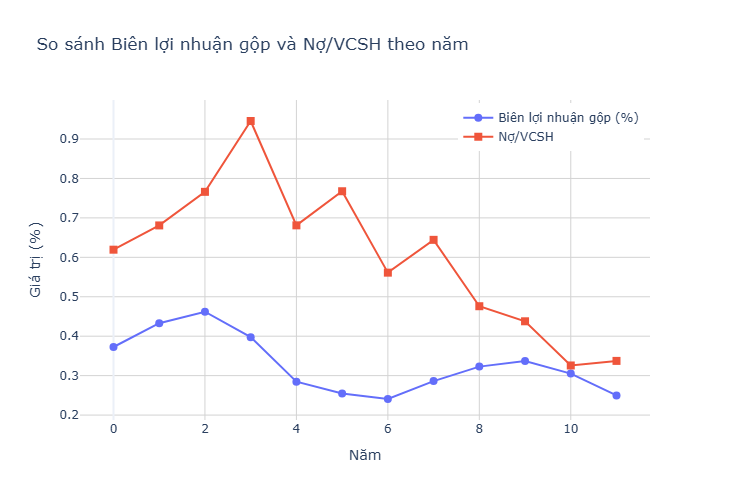

Interactive plot saved to ./outputs/ratio_comparison_plotly.html


In [11]:
# Convert matplotlib line chart to plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a copy of the data
Ratio_plot = Ratio.copy()

# Select the two columns
col1 = ('Chỉ tiêu khả năng sinh lợi', 'Biên lợi nhuận gộp (%)')
col2 = ('Chỉ tiêu cơ cấu nguồn vốn', 'Nợ/VCSH')

# Create a plotly figure
fig = go.Figure()

# Add the first line (Biên lợi nhuận gộp)
fig.add_trace(go.Scatter(
    x=Ratio_plot.index,
    y=Ratio_plot[col1],
    mode='lines+markers',
    name='Biên lợi nhuận gộp (%)',
    marker=dict(symbol='circle', size=8)
))

# Add the second line (Nợ/VCSH)
fig.add_trace(go.Scatter(
    x=Ratio_plot.index,
    y=Ratio_plot[col2],
    mode='lines+markers',
    name='Nợ/VCSH',
    marker=dict(symbol='square', size=8)
))

# Update layout
fig.update_layout(
    title='So sánh Biên lợi nhuận gộp và Nợ/VCSH theo năm',
    xaxis_title='Năm',
    yaxis_title='Giá trị (%)',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=0.99
    ),
    template='plotly_white',  # Use a white grid template similar to matplotlib
    width=800,
    height=500
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Display the plot inline
fig.show()

# Save as interactive HTML
html_file_path = './outputs/ratio_comparison_plotly.html'
fig.write_html(html_file_path)
print(f"Interactive plot saved to {html_file_path}")

# Display the HTML directly from the figure object
# from IPython.display import HTML
# import plotly.io as pio
# HTML(pio.to_html(fig, include_plotlyjs='cdn'))

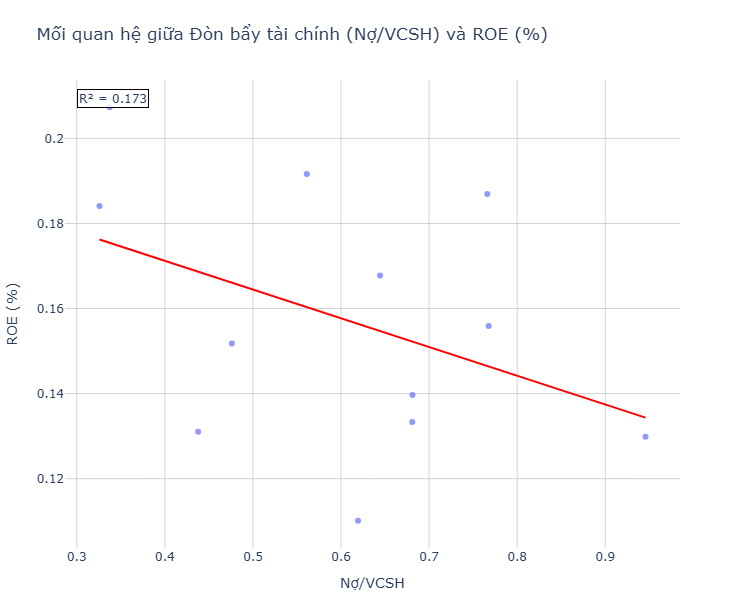

Interactive plot saved to ./outputs/roe_leverage_relationship_plotly.html


In [10]:
# Convert seaborn regplot to plotly
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from scipy import stats

# Select the columns
col_roe = ('Chỉ tiêu khả năng sinh lợi', 'ROE (%)')
col_debt_equity = ('Chỉ tiêu cơ cấu nguồn vốn', 'Nợ/VCSH')

# Prepare the DataFrame for plotting
df_plot = Ratio[[col_roe, col_debt_equity]].copy()
df_plot.columns = ['ROE (%)', 'Nợ/VCSH']

# Optional: add company or year info for further analysis
if ('Meta', 'CP') in Ratio.columns:
    df_plot['CP'] = Ratio[('Meta', 'CP')]
if ('Meta', 'Năm') in Ratio.columns:
    df_plot['Năm'] = Ratio[('Meta', 'Năm')]

# Create scatter plot with regression line using plotly
fig = px.scatter(
    df_plot, 
    x='Nợ/VCSH', 
    y='ROE (%)',
    trendline='ols',  # Add ordinary least squares regression line
    trendline_color_override='red',
    opacity=0.7,
    hover_data=['Năm'] if 'Năm' in df_plot.columns else None
)

# Calculate regression statistics for annotation
x = df_plot['Nợ/VCSH']
y = df_plot['ROE (%)']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

# Add annotation with R-squared value
fig.add_annotation(
    xref='paper', yref='paper',
    x=0.02, y=0.98,
    text=f'R² = {r_squared:.3f}',
    showarrow=False,
    font=dict(size=12),
    bgcolor='rgba(255, 255, 255, 0.8)',
    bordercolor='black',
    borderwidth=1
)

# Update layout
fig.update_layout(
    title='Mối quan hệ giữa Đòn bẩy tài chính (Nợ/VCSH) và ROE (%)',
    xaxis_title='Nợ/VCSH',
    yaxis_title='ROE (%)',
    template='plotly_white',
    width=800,
    height=600,
    margin=dict(l=50, r=50, t=80, b=50)
)

# Add grid
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Display the plot inline
fig.show()

# Save as interactive HTML
html_file_path = './outputs/roe_leverage_relationship_plotly.html'
fig.write_html(html_file_path)
print(f"Interactive plot saved to {html_file_path}")

# # Display the HTML directly from the figure object
# from IPython.display import HTML
# import plotly.io as pio
# HTML(pio.to_html(fig, include_plotlyjs='cdn'))

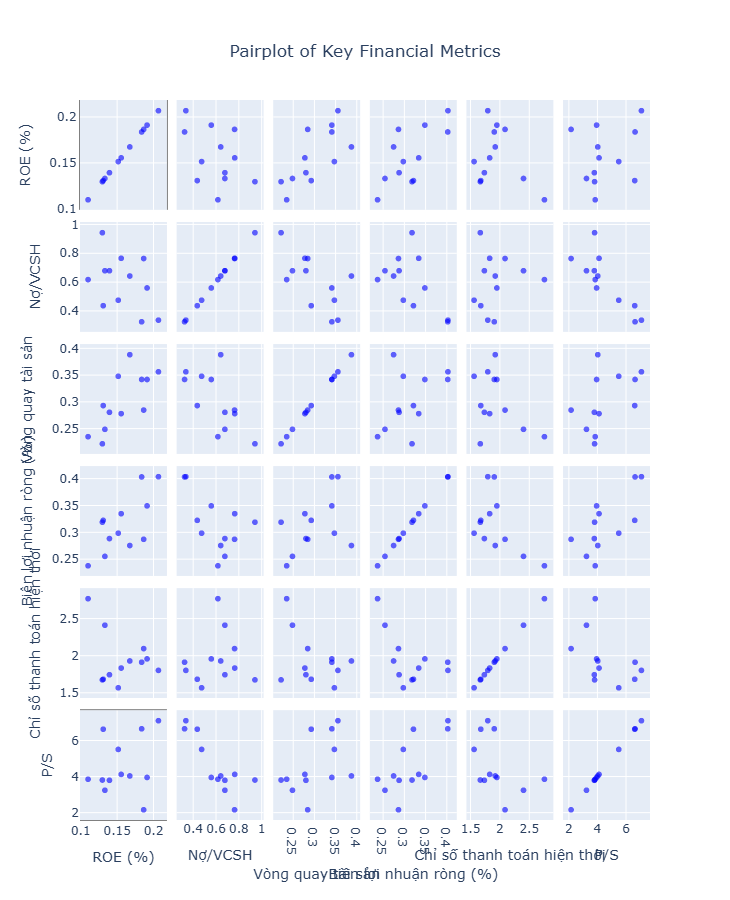

Interactive pairplot saved to financial_metrics_pairplot.html


In [12]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# Define the five most meaningful metrics (six columns for all pairwise relationships)
selected_cols = [
    ('Chỉ tiêu khả năng sinh lợi', 'ROE (%)'),
    ('Chỉ tiêu cơ cấu nguồn vốn', 'Nợ/VCSH'),
    ('Chỉ tiêu hiệu quả hoạt động', 'Vòng quay tài sản'),
    ('Chỉ tiêu khả năng sinh lợi', 'Biên lợi nhuận ròng (%)'),
    ('Chỉ tiêu thanh khoản', 'Chỉ số thanh toán hiện thời'),
    ('Chỉ tiêu định giá', 'P/S'),
]

# Subset the DataFrame
df_pair = Ratio[selected_cols].copy()

# Use only the second part of each column tuple (the metric name)
df_pair.columns = [col[1] for col in df_pair.columns]

# Optional: Remove rows with missing values for these columns
#df_pair = df_pair.dropna()

# Create a plotly figure using px.scatter_matrix for the pairplot
fig = px.scatter_matrix(
    df_pair,
    dimensions=df_pair.columns,
    title="Pairplot of Key Financial Metrics",
    labels={col: col for col in df_pair.columns},  # Use original column names as labels
    color_discrete_sequence=['blue'],
    opacity=0.6
)

# Update layout for better appearance
fig.update_layout(
    title={
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    dragmode='select',
    width=1000,
    height=900,
)

# Update traces for diagonal plots to show distributions
for i, col in enumerate(df_pair.columns):
    fig.update_traces(
        diagonal_visible=True, 
        showupperhalf=False,  # Only show lower half (like corner=True in seaborn)
        selector=dict(dimensions=[col])
    )

# Update axes to include zero when appropriate
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray', mirror=True)
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray', mirror=True)

# Show the plot
fig.show()

# Save to HTML for sharing
fig.write_html("./outputs/financial_metrics_pairplot.html")
print("Interactive pairplot saved to financial_metrics_pairplot.html")

In [ ]:
# Transform the balance sheet from long format to wide format. 

def BS_wide(stock=None):
    """
    Transform balance sheet data into a wide format with years as columns and metrics as rows.
    
    Parameters:
    -----------
    stock : object, default=None
        The stock ticker object containing financial data.
        If None, will create a default stock object for REE from VCI source.
    
    Returns:
    --------
    pandas.DataFrame
        Transformed balance sheet with years as columns and financial metrics as rows
    """
    
    # Create default stock object if not provided
    if stock is None:
        stock = Vnstock().stock(symbol='REE', source='VCI')
    
    # Get the balance sheet data
    BS = stock.finance.balance_sheet(period='year', lang='en', dropna=True)
    
    # Transpose the DataFrame
    BS_wide = BS.T
    
    # Promote header by setting column names using the second row (index 1)
    BS_wide.columns = BS_wide.iloc[1]
    
    # Keep only the data rows (skip the first 3 rows)
    BS_wide = BS_wide.iloc[3:]
    
    return BS_wide
# BS_wide(stock)

In [14]:
BalanceSheet = stock.finance.balance_sheet(period='year', lang='en', dropna=True)
BalanceSheet_Transposed = BalanceSheet.T
BalanceSheet_Transposed.columns = BalanceSheet_Transposed.iloc[1]
BalanceSheet_Transposed = BalanceSheet_Transposed.iloc[3:]
BalanceSheet_Transposed.head()


#Transform Income statement from long format to wide format. 

IncomeStatement = stock.finance.income_statement(period='year', lang='en', dropna=True)
IncomeStatement_Transpose= IncomeStatement.T
IncomeStatement_Transpose.columns = IncomeStatement_Transpose.iloc[1]
IncomeStatement_Transpose = IncomeStatement_Transpose.iloc[3:]
IncomeStatement_Transpose.head()


# BalanceSheet_Transposed.to_csv('./outputs/REE_BalanceSheet_Transposed.csv')
# IncomeStatement_Transpose.to_csv('./outputs/REE_IncomeStatement_Transpose.csv')
# CashFlow_transposed.to_csv('./outputs/REE_CashFlow_transposed.csv')

yearReport,2024,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013
Revenue (Bn. VND),8394604176003,8579347840237,9377949892489,5815207697974,5644088890450,4896700913533,5104605853407,4999235436523,3663193468551,2645193904607,2630675383788,2414569501626
Attribute to parent company (Bn. VND),1993385852649,2188316658468,2692516590418,1855079628131,1628076208584,1638893522530,1783971852557,1377087391977,1093237014487,853082411270,1061971178941,975819282949
Attribute to parent company YoY (%),-0.089078,-0.18726,0.451429,0.13943,-0.0066,-0.081323,0.295467,0.259642,0.281514,-0.196699,0.088287,0.0
Financial Income,317755694465,227055551430,186791709886,466044378716,221805860261,441971991367,303525295129,174539941233,176056435309,427537034206,459521649291,352660891530
Interest Expenses,-737977126660,-938879965835,-882746948990,-663213132564,-416425845956,-409016686932,-224927404624,-104642480959,-60159491918,-73966770226,-37413873577,-57146113236
